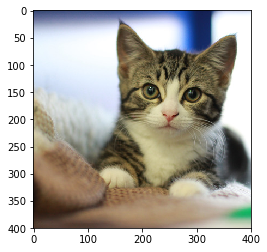

In [8]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./cat.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)

Note: You need "%matplotlib inline" to show the inline images here. Also opencv reads images in BGR order, so you want to convert color images to RGB for display with cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

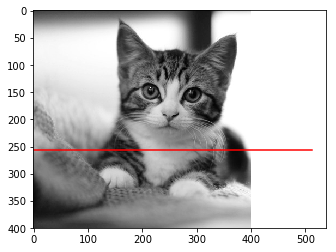

In [22]:
imgreen = img[:,:,1]

plt.imshow(imgreen, cmap='gray')

plt.plot([1, 512], [256, 256], 'red')

Note: In python, arrays start with ZERO not ONE like Matlab so 1 is green, not 2 (0=red, 1=green, 2=blue). Also note that matplotlib needs you to tell it to use a gray color palate here.

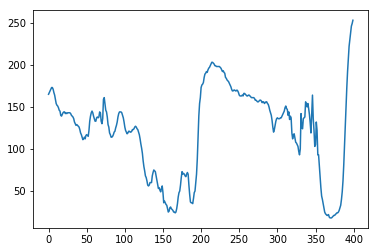

In [23]:
plt.plot(imgreen[256,:])

In [26]:
print(img.shape)
print(img.dtype)

(400, 400, 3)
uint8


Note: In open cv its img.shape instead of size(img) and img.dtype instead of class(img)

In [30]:
print(img[50,100])
print(img[50,:])

[245 250 255]
[[223 236 253]
 [223 236 253]
 [223 236 253]
 ..., 
 [255 255 255]
 [255 255 255]
 [255 255 255]]


(200, 150, 3)


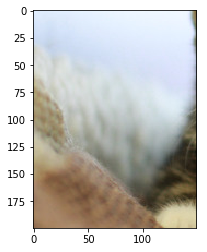

In [32]:
cropped = img[110:310, 10:160]
plt.imshow(cropped)
print(cropped.shape)

Note: Python ranges are NOT inclusive of the last value like Matlab is.

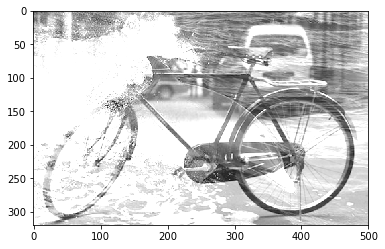

In [57]:
dolphin = cv2.imread('dolphin.png').astype('uint16')
bicycle = cv2.imread('bicycle.png').astype('uint16')

def clipimshow(img16):
    plt.imshow(img16.clip(0,255).astype('uint8'))

summed = dolphin + bicycle
clipimshow(summed)

Note: Numpy arrays are different than matlab arrays in that they use modulo arithmitic, so that means that in type uint8 where the maxval is 255, numpy will treat 200 + 100 = 45. Matlab will "clip" so that 200 + 100 = 255. To achieve the same result as matlab with numpy addition, you need to increase the max value by converting to a larger type, in this case uint16 which has 16 bits instead of 8. With this, we can add the two numbers, and then clip manually after and return to uint8.

OpenCV makes this a bit easier by providing a helper: cv2.add so instead of all that, we could do cv2.add(dolphin,bicycle)

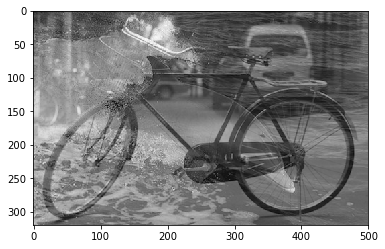

In [58]:
average = dolphin / 2 + bicycle / 2
clipimshow(average)

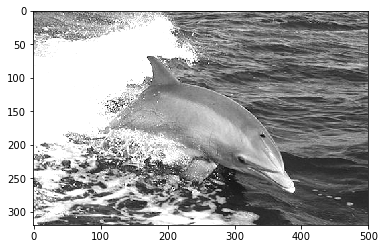

In [59]:
def scale(img, value):
    return img * value

clipimshow(scale(dolphin, 1.5))

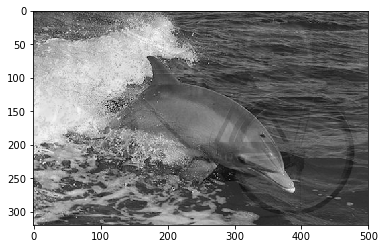

In [60]:
def blend(im1, im2, alpha):
    return im1 * alpha + im2 * (1 - alpha)

clipimshow(blend(dolphin, bicycle, 0.85))

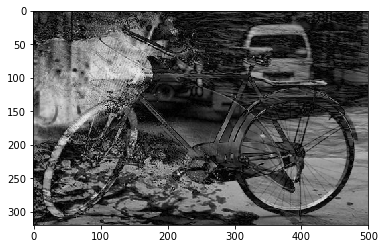

In [61]:
clipimshow(np.absolute(bicycle.astype('int16') - dolphin.astype('int16')))

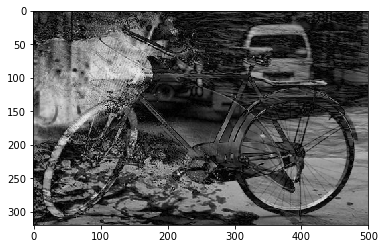

In [63]:
plt.imshow(cv2.absdiff(bicycle.astype('uint8'), dolphin.astype('uint8')))

(array([   18.,    56.,    96.,   155.,   271.,   498.,   708.,   902.,
         1084.,  1153.,  1182.,  1080.,   874.,   697.,   525.,   312.,
          191.,    88.,    55.,    24.]),
 array([-3. , -2.7, -2.4, -2.1, -1.8, -1.5, -1.2, -0.9, -0.6, -0.3,  0. ,
         0.3,  0.6,  0.9,  1.2,  1.5,  1.8,  2.1,  2.4,  2.7,  3. ]),
 <a list of 20 Patch objects>)

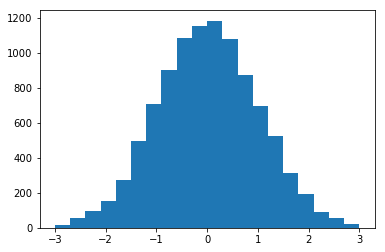

In [79]:
noise = np.random.normal(0,1,10000)

plt.hist(noise, np.linspace(-3, 3, 21))

(array([    0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,  2997.,  3024.,  2977.,  1002.,     0.,     0.,
            0.,     0.,     0.,     0.]),
 array([-3. , -2.7, -2.4, -2.1, -1.8, -1.5, -1.2, -0.9, -0.6, -0.3,  0. ,
         0.3,  0.6,  0.9,  1.2,  1.5,  1.8,  2.1,  2.4,  2.7,  3. ]),
 <a list of 20 Patch objects>)

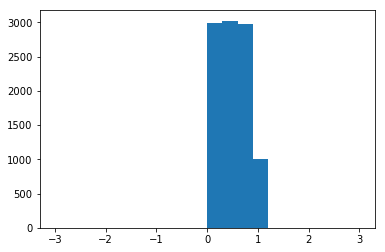

In [80]:
noise = np.random.rand(10000)

plt.hist(noise, np.linspace(-3, 3, 21))